In [1]:
#Set up and Read the data
import pandas as pd
import sqlite3
# read csv file
df_Fact = pd.read_csv('/content/bank_transactions.csv',index_col=0)

In [2]:
df_Fact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048567 entries, T1 to T1048567
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustomerID               1048567 non-null  object 
 1   CustomerDOB              1045170 non-null  object 
 2   CustGender               1047467 non-null  object 
 3   CustLocation             1048416 non-null  object 
 4   CustAccountBalance       1046198 non-null  float64
 5   TransactionDate          1048567 non-null  object 
 6   TransactionTime          1048567 non-null  int64  
 7   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 72.0+ MB


In [3]:
df_Fact.isna().sum()

,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [4]:
df_Fact.isna().sum().sum()

np.int64(7017)

In [5]:
df_Fact.dropna(inplace=True)
df_Fact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041614 entries, T1 to T1048567
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustomerID               1041614 non-null  object 
 1   CustomerDOB              1041614 non-null  object 
 2   CustGender               1041614 non-null  object 
 3   CustLocation             1041614 non-null  object 
 4   CustAccountBalance       1041614 non-null  float64
 5   TransactionDate          1041614 non-null  object 
 6   TransactionTime          1041614 non-null  int64  
 7   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 71.5+ MB


In [6]:
min_transaction = df_Fact['TransactionAmount (INR)'].min()
max_transaction = df_Fact['TransactionAmount (INR)'].max()

print(f"Minimum Transaction Amount: {min_transaction}")
print(f"Maximum Transaction Amount: {max_transaction}")


Minimum Transaction Amount: 0.0
Maximum Transaction Amount: 1560034.99


In [7]:
df_Fact[df_Fact['TransactionAmount (INR)']<=0.0].count()

,0
CustomerID,820
CustomerDOB,820
CustGender,820
CustLocation,820
CustAccountBalance,820
TransactionDate,820
TransactionTime,820
TransactionAmount (INR),820


In [8]:
df_Fact = df_Fact[df_Fact['TransactionAmount (INR)'] > 0.0]
df_Fact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1040794 entries, T1 to T1048567
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustomerID               1040794 non-null  object 
 1   CustomerDOB              1040794 non-null  object 
 2   CustGender               1040794 non-null  object 
 3   CustLocation             1040794 non-null  object 
 4   CustAccountBalance       1040794 non-null  float64
 5   TransactionDate          1040794 non-null  object 
 6   TransactionTime          1040794 non-null  int64  
 7   TransactionAmount (INR)  1040794 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 71.5+ MB


In [9]:
min_balance = df_Fact['CustAccountBalance'].min()
max_balance = df_Fact['CustAccountBalance'].max()

print(f"Minimum balance: {min_balance}")
print(f"Maximum balance: {max_balance}")

Minimum balance: 0.0
Maximum balance: 115035495.1


In [10]:
df_Fact = df_Fact[df_Fact['CustAccountBalance'] >= 0.0]
df_Fact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1040794 entries, T1 to T1048567
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustomerID               1040794 non-null  object 
 1   CustomerDOB              1040794 non-null  object 
 2   CustGender               1040794 non-null  object 
 3   CustLocation             1040794 non-null  object 
 4   CustAccountBalance       1040794 non-null  float64
 5   TransactionDate          1040794 non-null  object 
 6   TransactionTime          1040794 non-null  int64  
 7   TransactionAmount (INR)  1040794 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 103.7+ MB


In [11]:
df_Fact[df_Fact['CustAccountBalance'] < df_Fact['TransactionAmount (INR)']][['CustomerID','CustAccountBalance','TransactionAmount (INR)']]

,CustomerID,CustAccountBalance,TransactionAmount (INR)
TransactionID,,,
T2,C2142763,2270.69,27999.00
T27,C5430368,285.76,5500.00
T35,C7017047,39.73,110.00
T37,C4320949,213.06,1081.00
T47,C8934588,5055.18,13846.00
...,...,...,...
T1048538,C9016563,1002.96,1146.65
T1048539,C3319123,200.62,401.20
T1048543,C6210667,6.42,800.00


In [12]:
df_Fact=df_Fact[df_Fact['CustAccountBalance'] >= df_Fact['TransactionAmount (INR)']]
df_Fact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 938173 entries, T1 to T1048567
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CustomerID               938173 non-null  object 
 1   CustomerDOB              938173 non-null  object 
 2   CustGender               938173 non-null  object 
 3   CustLocation             938173 non-null  object 
 4   CustAccountBalance       938173 non-null  float64
 5   TransactionDate          938173 non-null  object 
 6   TransactionTime          938173 non-null  int64  
 7   TransactionAmount (INR)  938173 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 64.4+ MB


In [13]:
df_Fact['CustomerDOB'] = df_Fact['CustomerDOB'].astype('datetime64[ns]')
df_Fact['TransactionDate'] = df_Fact['TransactionDate'].astype('datetime64[ns]')
df_Fact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 938173 entries, T1 to T1048567
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustomerID               938173 non-null  object        
 1   CustomerDOB              938173 non-null  datetime64[ns]
 2   CustGender               938173 non-null  object        
 3   CustLocation             938173 non-null  object        
 4   CustAccountBalance       938173 non-null  float64       
 5   TransactionDate          938173 non-null  datetime64[ns]
 6   TransactionTime          938173 non-null  int64         
 7   TransactionAmount (INR)  938173 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 64.4+ MB


In [14]:
min_transaction = df_Fact['TransactionDate'].min()
max_transaction = df_Fact['TransactionDate'].max()

print(f"Minimum TransactionDate : {min_transaction}")
print(f"Maximum TransactionDate : {max_transaction}")

Minimum TransactionDate : 2016-01-08 00:00:00
Maximum TransactionDate : 2016-12-09 00:00:00


In [15]:
df_Fact['Age'] = (df_Fact['TransactionDate'] - df_Fact['CustomerDOB']).dt.days / 365
df_Fact['Age'] = df_Fact['Age'].astype('int64')

In [16]:
min_transaction = df_Fact['Age'].min()
max_transaction = df_Fact['Age'].max()

print(f"Minimum Age : {min_transaction}")
print(f"Maximum Age : {max_transaction}")

Minimum Age : -59
Maximum Age : 217


In [25]:
bins = range(0, 250, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df=pd.DataFrame()
# Categorize ages into bins
df['age_group'] = pd.cut(df_Fact['Age'], bins=bins, labels=labels, right=False)

# Count number of rows in each age group
age_group_counts = df['age_group'].value_counts().sort_index()

In [26]:
age_group_counts

,count
age_group,
0-9,166
10-19,13082
20-29,481050
30-39,276912
40-49,19640
50-59,0
60-69,0
70-79,0
80-89,0


In [27]:
df_Fact = df_Fact[(df_Fact['Age'] >= 10) & (df_Fact['Age'] < 100)]
df_Fact['Age'].describe()

,Age
count,790684.000000
mean,28.397987
std,5.175405
min,10.000000
25%,24.000000
50%,28.000000
75%,32.000000
max,41.000000


In [28]:
customers_with_multiple_ages = df_Fact.groupby('CustomerID')['Age'].nunique()
customers_with_multiple_ages[customers_with_multiple_ages > 1].size

82199

In [29]:
customers_with_multiple_gender = df_Fact.groupby('CustomerID')['CustGender'].nunique()
customers_with_multiple_gender[customers_with_multiple_gender > 1]

,CustGender
CustomerID,
C1010011,2
C1010014,2
C1010046,2
C1010081,2
C1010089,2
...,...
C9067524,2
C9071415,2
C9079190,2


In [31]:
df_Fact=df_Fact[~df_Fact['CustomerID'].isin(customers_with_multiple_ages[customers_with_multiple_ages > 1].index)]
df_Fact=df_Fact[~df_Fact['CustomerID'].isin(customers_with_multiple_gender[customers_with_multiple_gender > 1].index)]
df_Fact

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
TransactionID,,,,,,,,,
T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,21
T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,19
T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,27
T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.0,34
T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-02-08,192825,833.0,27
...,...,...,...,...,...,...,...,...,...
T1048560,C2427315,1988-10-28,M,PAREL MUMBAI,7315.11,2016-09-18,184632,765.0,27
T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26
T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24


In [32]:
df_Fact['CustLocation']=df_Fact['CustLocation'].str.upper()

In [33]:
location_counts = df_Fact.groupby('CustLocation')['CustomerID'].count()
top_5_locations = location_counts.sort_values(ascending=False).head(5)
top_5_locations

,CustomerID
CustLocation,
MUMBAI,60740
BANGALORE,49183
NEW DELHI,46640
GURGAON,45628
DELHI,41642


In [34]:
df_Fact.rename(columns={'TransactionAmount (INR)':'TransactionAmount'},inplace=True)

In [37]:
# connect to database
conn = sqlite3.connect("RFMdb")
cur = conn.cursor()
# load CRM data into the RFMdb database
df_Fact.to_sql("data", conn)
# CHECK IF DATA INSERTED INTO data/RFMdb
df_Fact = pd.read_sql('SELECT * FROM data', conn)
df_Fact

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age
0,T1,C5841053,1994-10-01 00:00:00,F,JAMSHEDPUR,17819.05,2016-02-08 00:00:00,143207,25.0,22
1,T3,C4417068,1996-11-26 00:00:00,F,MUMBAI,17874.44,2016-02-08 00:00:00,142712,459.0,20
2,T5,C9031234,1988-03-24 00:00:00,F,NAVI MUMBAI,6714.43,2016-02-08 00:00:00,181156,1762.5,28
3,T7,C7126560,1992-01-26 00:00:00,F,MUMBAI,973.46,2016-02-08 00:00:00,173806,566.0,24
4,T8,C1220223,1982-01-27 00:00:00,M,MUMBAI,95075.54,2016-02-08 00:00:00,170537,148.0,34
...,...,...,...,...,...,...,...,...,...,...
876729,T1048563,C8020229,1990-08-04 00:00:00,M,NEW DELHI,7635.19,2016-09-18 00:00:00,184824,799.0,26
876730,T1048564,C6459278,1992-02-20 00:00:00,M,NASHIK,27311.42,2016-09-18 00:00:00,183734,460.0,24
876731,T1048565,C6412354,1989-05-18 00:00:00,M,HYDERABAD,221757.06,2016-09-18 00:00:00,183313,770.0,27
876732,T1048566,C6420483,1978-08-30 00:00:00,M,VISAKHAPATNAM,10117.87,2016-09-18 00:00:00,184706,1000.0,38


In [38]:
len(df_Fact['CustLocation'].unique())

7471

In [39]:
df_Fact3 = pd.read_sql(''' SELECT CustomerID,rfm_recency, rfm_frequency, rfm_monetary, age, CustAccountBalance, gender
    FROM
     ( SELECT CustomerID,
             max(TransactionDate) AS rfm_recency,
             count(TransactionID) AS rfm_frequency,
             sum(TransactionAmount) AS rfm_monetary,
             max(Age) as age,
             max(CustGender) as gender,
             avg(CustAccountBalance) as CustAccountBalance

      FROM
            data
      GROUP BY CustomerID
      )
 ''', conn)

In [41]:
df_Fact3=pd.get_dummies(df_Fact3, columns=['gender'], prefix='gender', drop_first=True)

In [ ]:
df_Fact3['gender_M']=df_Fact3['gender_M'].astype(int)

In [44]:
df_Fact3['rfm_recency'] = pd.to_datetime(df_Fact3['rfm_recency'])
# Create date variable that records recency
import numpy as np
import datetime
df_Fact3['rfm_recency'] = df_Fact3['rfm_recency'].dt.date
# Create snapshot date
snapshot_date = df_Fact3['rfm_recency'].max() + datetime.timedelta(days=1)
print(snapshot_date)
# Aggregate data by each customer
customers = df_Fact3.groupby(['CustomerID']).agg({
'rfm_recency': lambda x: (snapshot_date - x.max()).days,
'rfm_frequency':'sum' ,
'rfm_monetary': 'sum',
'age': 'max',
'CustAccountBalance': 'max',
'gender_M': 'max'})

2016-12-10


In [45]:
customers

,rfm_recency,rfm_frequency,rfm_monetary,age,CustAccountBalance,gender_M
CustomerID,,,,,,
C1010011,75,2,5106.0,33,76340.635,1
C1010012,118,1,1499.0,22,24204.490,1
C1010014,155,2,1455.0,32,100112.950,1
C1010018,86,1,30.0,26,496.180,0
C1010028,103,1,557.0,28,296828.370,0
...,...,...,...,...,...,...
C9099836,155,1,691.0,25,133067.230,1
C9099877,86,1,222.0,20,96063.460,1
C9099919,114,1,126.0,23,5559.750,1


Text(0.5, 1.0, 'Histogram and Recency')

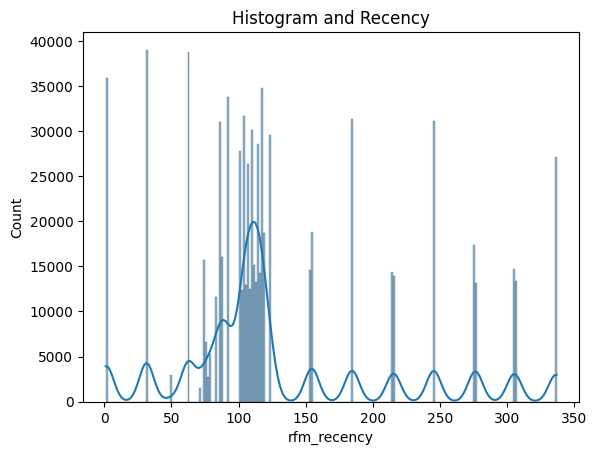

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=customers, x='rfm_recency', kde=True)
ax.set_title('Histogram and Recency')

Text(0.5, 1.0, 'Histogram and Frequency')

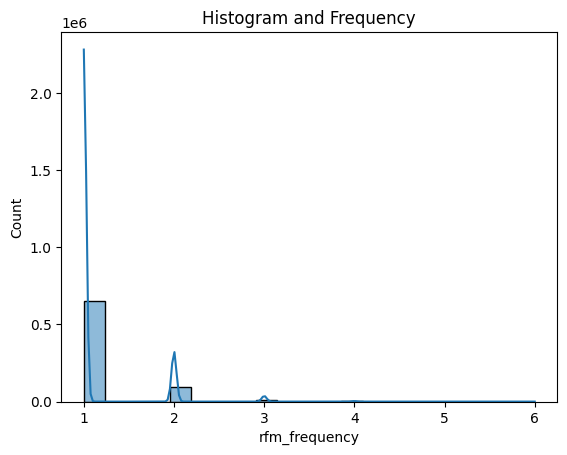

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=customers, x='rfm_frequency', kde=True)
ax.set_title('Histogram and Frequency')

Text(0.5, 1.0, 'Histogram and MonetaryValue')

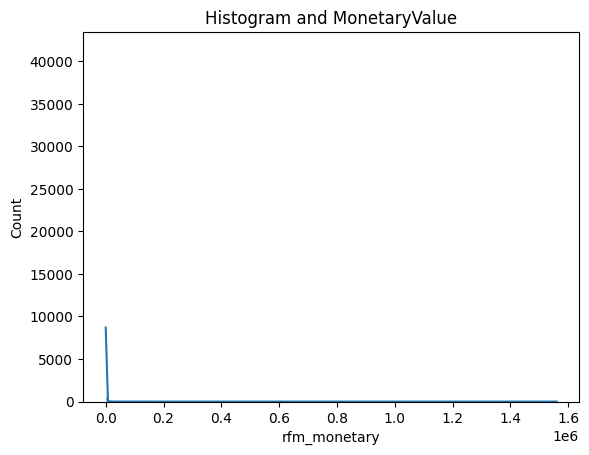

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=customers, x='rfm_monetary', kde=True)
ax.set_title('Histogram and MonetaryValue')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=customers, x='gender_M', kde=True)
ax.set_title('Histogram and MonetaryValue')

In [49]:
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["rfm_recency"] = stats.boxcox(customers['rfm_recency'])[0]
customers_fix["rfm_frequency"] = stats.boxcox(customers['rfm_frequency'])[0]
customers_fix["rfm_monetary"] = stats.boxcox(customers['rfm_monetary'])[0]
customers_fix["age"] = stats.boxcox(customers['age'])[0]
customers_fix["CustAccountBalance"] = stats.boxcox(customers['CustAccountBalance'])[0]
customers_fix["gender_M"] = stats.boxcox(customers['gender_M']+1)[0]
customers_fix.tail()

,rfm_recency,rfm_frequency,rfm_monetary,age,CustAccountBalance,gender_M
759159,28.942842,0.0,7.666000,2.622589,26.440846,6.925071
759160,20.232771,0.0,6.158447,2.474498,25.088273,6.925071
759161,24.039411,0.0,5.436271,2.567762,15.299279,6.925071
759162,22.732169,0.0,4.298702,2.507252,21.254013,6.925071
759163,18.745597,0.0,7.957908,2.819638,15.957000,6.925071


In [50]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[-0.  0. -0.  0. -0.  0.]
[1. 1. 1. 1. 1. 1.]


<ipython-input-51-dd8790841728>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(6, 1, 3); sns.distplot(customers_fix['rfm_monetary'])
<ipython-input-51-dd8790841728>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(6, 1, 4); sns.distplot(customers_fix['age'])
<ipython-input-51-dd8790841728>:9: Us

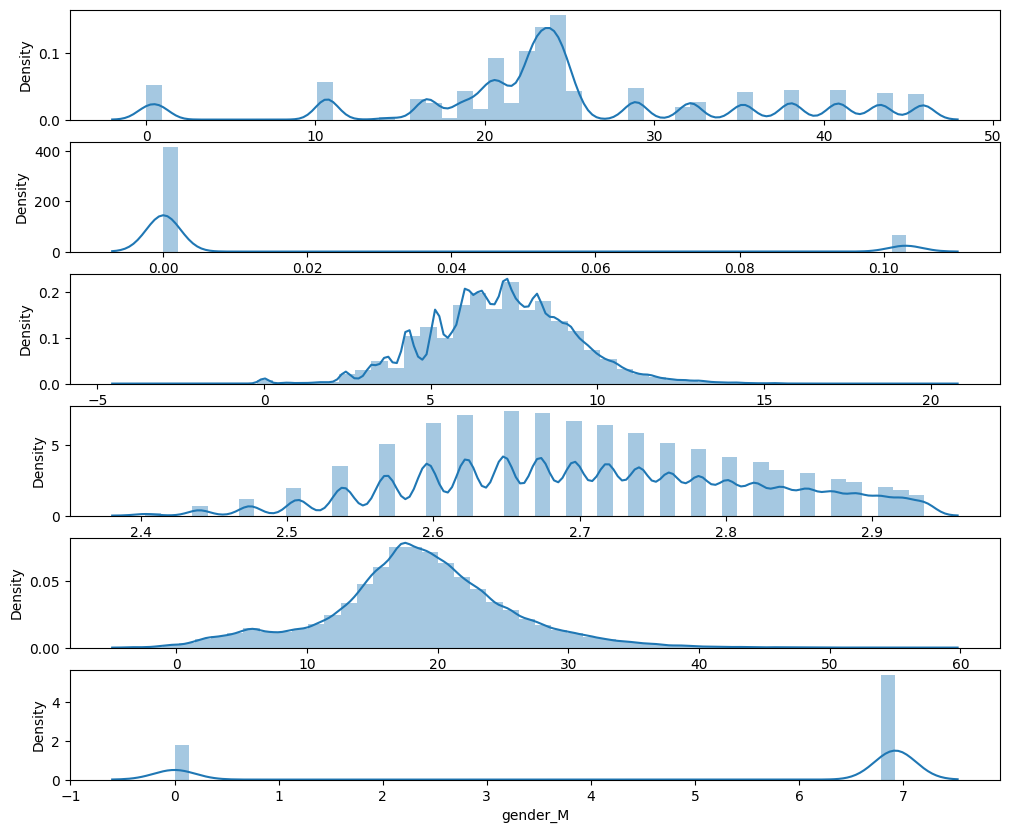

In [51]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(6, 1, 1); sns.distplot(customers_fix['rfm_recency'])
# Plot distribution of F
plt.subplot(6, 1, 2); sns.distplot(customers_fix['rfm_frequency'])
# Plot distribution of M
plt.subplot(6, 1, 3); sns.distplot(customers_fix['rfm_monetary'])
plt.subplot(6, 1, 4); sns.distplot(customers_fix['age'])
plt.subplot(6, 1, 5); sns.distplot(customers_fix['CustAccountBalance'])
plt.subplot(6, 1, 6); sns.distplot(customers_fix['gender_M'])
# Show the plot
plt.show()

#Task B

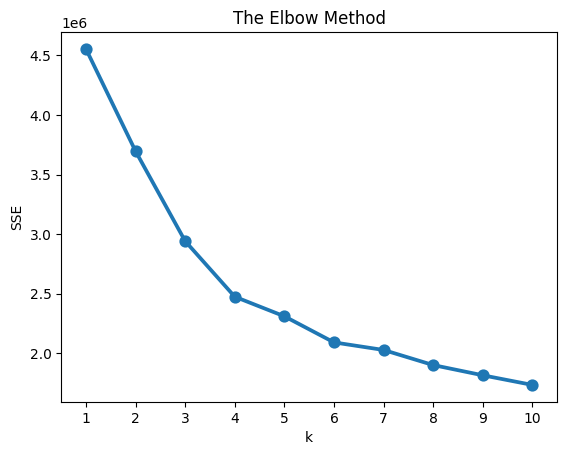

In [52]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

,rfm_recency,rfm_frequency,rfm_monetary,age,CustAccountBalance,gender_M
Cluster,,,,,,
0,179957,179957,179957,179957,179957,179957
1,227863,227863,227863,227863,227863,227863
2,246408,246408,246408,246408,246408,246408
3,104936,104936,104936,104936,104936,104936


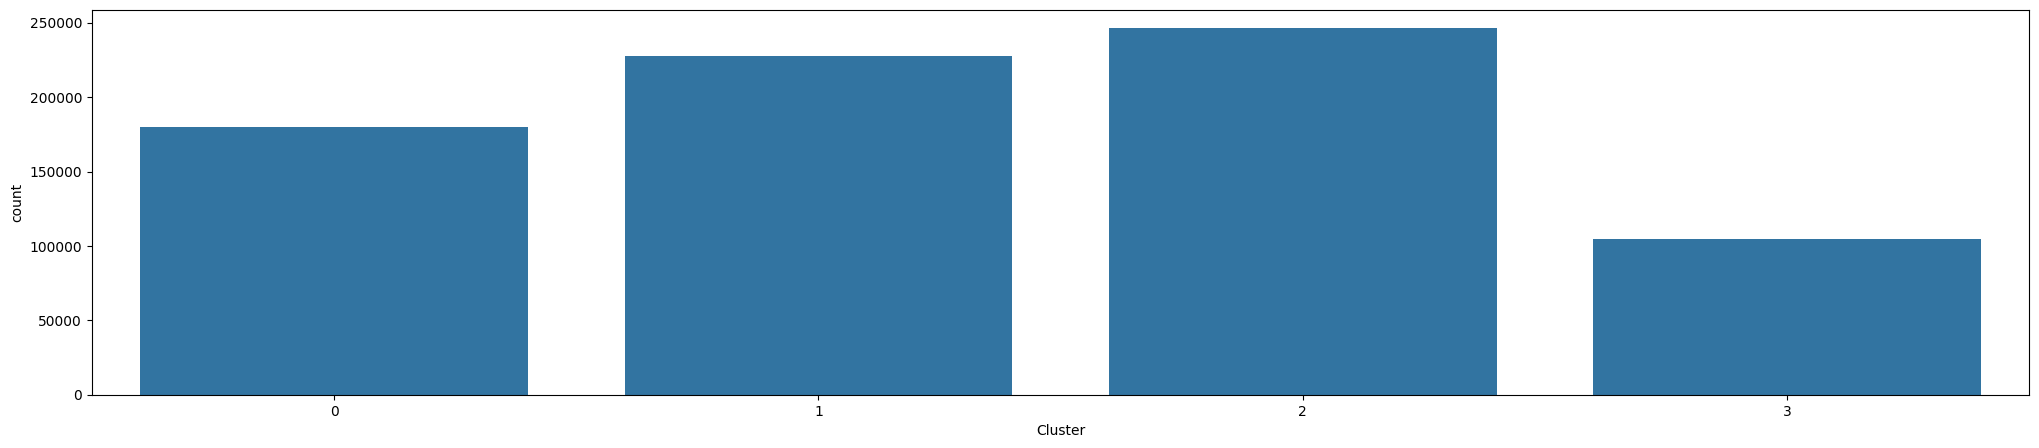

In [53]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
'rfm_recency':'mean',
'rfm_frequency':'mean',
'rfm_monetary':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=customers)
customers.groupby(['Cluster']).count()

In [54]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'rfm_recency':'mean',
    'rfm_frequency':'mean',
    'rfm_monetary':['mean', 'count']}).round(2)

rfm_recency rfm_frequency rfm_monetary        
               mean          mean         mean   count
Cluster                                               
0            137.97          1.00      1407.00  179957
1            139.05          1.00      2145.57  227863
2            136.15          1.00       368.80  246408
3             91.85          2.12      2676.13  104936

<Axes: xlabel='Attribute', ylabel='Value'>

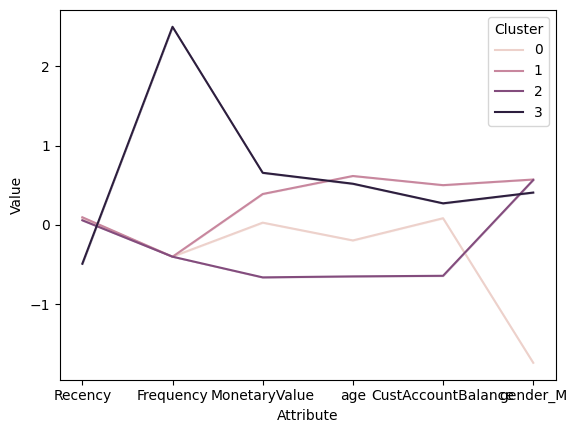

In [55]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue','age','CustAccountBalance','gender_M'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue','age','CustAccountBalance','gender_M'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot(x = 'Attribute', y= 'Value', hue='Cluster', data=df_nor_melt)